# Testing `random.multivariate_normal`

The numpy version of `random.multivariate_normal` unfortunately requires that `mean` is size N and `cov` is size `(N,N)`.

Other versions exist that allow `mean` of size (..., N) and `cov` of size (N, N). In this notebook, I check their results

## Compare distributions

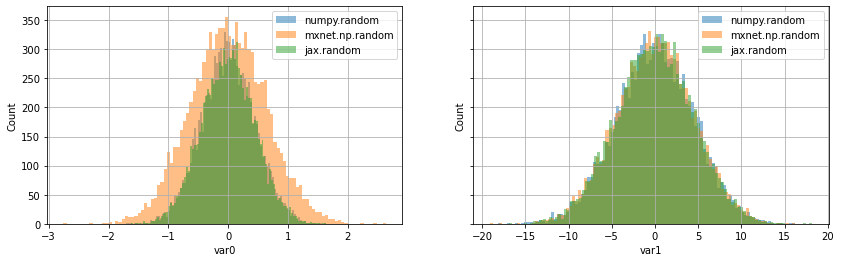

In [2]:
import numpy as np
from mxnet import np as mxnp
import jax
import matplotlib.pyplot as plt

mean = np.array([0., 0.])
cov = np.array([[0.2, 0.2],[0.2, 20]])
mean_mxnp = mxnp.array(mean)
cov_mxnp = mxnp.array(cov)

mvn_np = np.random.multivariate_normal(mean, cov, size=10000)
mvn_mxnp = mxnp.random.multivariate_normal(mean_mxnp, cov_mxnp, size=10000).asnumpy()
mvn_jax = np.array(jax.random.multivariate_normal(jax.random.PRNGKey(0), mean, cov, shape=(10000,)))

fig = plt.figure(figsize=(14, 4))
ax = fig.subplots(1, len(mean), sharey=True)
for idx in range(len(mean)):
    ax[idx].hist(mvn_np[:,idx], bins=100, alpha=0.5, label="numpy.random")
    ax[idx].hist(mvn_mxnp[:,idx], bins=100, alpha=0.5, label="mxnet.np.random")
    ax[idx].hist(mvn_jax[:,idx], bins=100, alpha=0.5, label="jax.random")
    ax[idx].set_xlabel(f"var{idx}")
    ax[idx].set_ylabel(f"Count")
    ax[idx].legend()
    ax[idx].grid()